In [1]:
import numpy as np
import pandas as pd
from random import choice
import matplotlib.pyplot as plt

from collections import Counter

import neattext.functions as ntf
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud 

import gensim
from gensim import corpora

#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('stopwords')

In [2]:
df_cleaned = pd.read_csv("Data/cleaded_data.csv")
df_cleaned.head()

,date,username,like_count,retweet_count,processed_content
0,2023-03-29,RealProfitPros,0.0,0.0,"free ai marketing automation tools, strategies..."
1,2023-03-29,AmyLouWho321,0.0,0.0,chat gpt says 15. :face_with_tears_of_joy:
2,2023-03-29,yjleon1976,0.0,0.0,- chat pdf! check new ai quickly answers quest...
3,2023-03-29,ChatGPT_Thinks,0.0,0.0,"ai muses: ""in court life, face judge destiny j..."
4,2023-03-29,cordydbarb,0.0,0.0,no! chat gpt putting amazing recipes :tired_fa...


In [3]:
## Lemmatize processed text 
wordnet_lem = WordNetLemmatizer()

df_cleaned['content_lem'] = df_cleaned['processed_content'].apply(wordnet_lem.lemmatize).apply(ntf.remove_puncts).apply(ntf.remove_shortwords)
all_words_lem = ' '.join([word for word in df_cleaned['content_lem']])

In [4]:
df_cleaned

,date,username,like_count,retweet_count,processed_content,content_lem
0,2023-03-29,RealProfitPros,0.0,0.0,"free ai marketing automation tools, strategies...",free marketing automation tools strategies col...
1,2023-03-29,AmyLouWho321,0.0,0.0,chat gpt says 15. :face_with_tears_of_joy:,chat says facewithtearsofjoy
2,2023-03-29,yjleon1976,0.0,0.0,- chat pdf! check new ai quickly answers quest...,chat check quickly answers questions pdfs perf...
3,2023-03-29,ChatGPT_Thinks,0.0,0.0,"ai muses: ""in court life, face judge destiny j...",muses court life face judge destiny jury actio...
4,2023-03-29,cordydbarb,0.0,0.0,no! chat gpt putting amazing recipes :tired_fa...,chat putting amazing recipes tiredface tiredfa...
...,...,...,...,...,...,...
459634,2023-01-04,Pup_In_Cup,1.0,0.0,lamda versus chatgpt ?! cares? lamda available...,lamda versus chatgpt cares lamda available cha...
459635,2023-01-04,TryingToOffend,2.0,0.0,chatgpt censorship. trust system admin.,chatgpt censorship trust system admin
459636,2023-01-04,mcp350,3.0,1.0,twitter feed chatgpt lol :grinning_squinting_f...,twitter feed chatgpt grinningsquintingface cha...
459637,2023-01-04,manumurali369,1.0,0.0,i'm amazed chat gpt. promising person :grinnin...,amazed chat promising person grinningfacewiths...


In [5]:
## Define a custom color function for Wordcloud
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#1DA1F2', '#00CC96', '#FF5733', '#FFC300', '#E91E63', '#9C27B0', '#673AB7', '#800000', '#9370DB',
             '#7CFC00', '#1E90FF', '#FF3030', '#FFD700']
    return choice(colors)

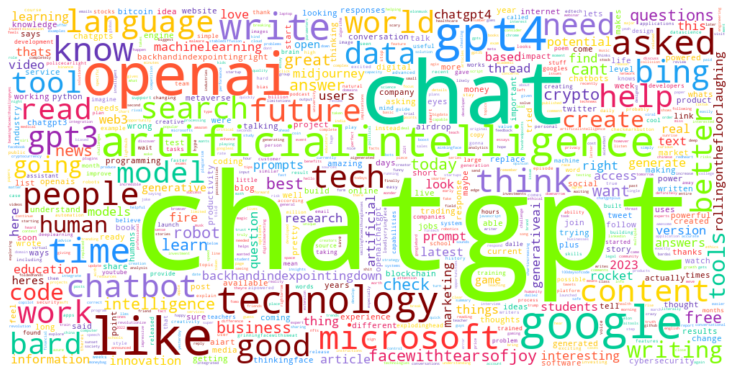

In [6]:
## create a word cloud
word_frequencies = dict(Counter(all_words_lem.split(' ')).most_common())

wordcloud_twitter = WordCloud(height=500, width=1000, max_words=1000,
                              background_color="white", mode="RGB",
                              ).generate_from_frequencies(word_frequencies)

plt.figure(figsize=[10, 10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter.recolor(color_func=custom_color_func), interpolation="bilinear")

# Store visualization to file
plt.savefig("twitter_unigram.png", format="png")

plt.show()

In [7]:
# Let's sort the dataframe and get top 10000 most liked tweets

df_sorted = df_cleaned.sort_values(by='like_count', ascending=False)
df_top_10000 = df_sorted.iloc[:10000]



In [8]:
## lemmatize the processed content
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

docs = df_top_10000['processed_content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

# Create a dictionary of words and their frequency
dictionary = corpora.Dictionary(docs)

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in docs]


In [9]:
## Topic modeling using LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, 
                                            chunksize=1000, passes=10, per_word_topics=True)
# topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {} \n'.format(idx, topic))
    

Topic: 0 
Words: 0.018*"wrong" + 0.017*"market" + 0.015*"solution" + 0.015*"na" + 0.010*"gon" + 0.010*"stock" + 0.010*"information" + 0.008*"likely" + 0.008*"engineering" + 0.007*"warning" 

Topic: 1 
Words: 0.053*"chatgpt" + 0.034*"asked" + 0.027*"write" + 0.020*"poem" + 0.009*"maybe" + 0.008*"bit" + 0.008*"analytics" + 0.008*"style" + 0.007*"sound" + 0.007*"collision" 

Topic: 2 
Words: 0.039*"chatgpt" + 0.014*"good" + 0.013*"like" + 0.011*"thing" + 0.010*"going" + 0.009*"job" + 0.008*"people" + 0.008*"asked" + 0.008*"think" + 0.008*"tell" 

Topic: 3 
Words: 0.061*"chatgpt" + 0.020*"question" + 0.017*"answer" + 0.016*"asked" + 0.014*"ai" + 0.010*"ask" + 0.007*"story" + 0.007*"said" + 0.006*"research" + 0.006*"time" 

Topic: 4 
Words: 0.051*"chatgpt" + 0.016*"prompt" + 0.010*"follow" + 0.010*"free" + 0.009*"link" + 0.009*"post" + 0.008*"comment" + 0.007*"like" + 0.007*"following" + 0.006*"hour" 

Topic: 5 
Words: 0.090*"ai" + 0.084*"chatgpt" + 0.017*"technology" + 0.013*"openai" + 0.0